<img src="tmva_logo.gif" height="20%" width="20%">

# TMVA tt+charm(bar) Classification in Python

Adpt from the tutorial TMVA higgs classification example.
Use some of the native TMVA methods and methods from Keras and scikit-learn.

In [1]:
import ROOT
from ROOT import TMVA

Welcome to JupyROOT 6.20/06


## Declare Factory

 - The first argument is the base of the name of all the output
weightfiles in the directory weight/ that will be created with the 
method parameters 

 - The second argument is the output file for the training results
  
 - The third argument is a string option defining some general configuration for the TMVA session. For example all TMVA output can be suppressed by removing the "!" (not) in front of the "Silent" argument in the option string

In [2]:
ROOT.TMVA.Tools.Instance()
## For PYMVA methods
TMVA.PyMethodBase.PyInitialize();


outputFile = ROOT.TFile.Open("/eos/user/e/efe/DataAnalysis/ntuples_and_plots/11nov/TMVA_ClassificationOutput.root", "RECREATE") 
factory = ROOT.TMVA.Factory("TMVA_ClassificationOutput", outputFile,
                      "!V:ROC:!Silent:Color:!DrawProgressBar:AnalysisType=Classification" )

## Input Data


In [3]:
#inputFileName = "root://eosuser.cern.ch//eos/user/e/efe/SWAN_projects/tmva-tutorial/notebooks/MC13TeV_2017_TAToTTQ_MA-scan_TuneCP5_13TeV_G2HDM-rtc04.root"
#inputFileName2 = "root://eosuser.cern.ch//eos/user/e/efe/SWAN_projects/tmva-tutorial/notebooks/MC13TeV_2017_TTJets.root"
#inputFileName4 = "root://eosuser.cern.ch//eos/user/e/efe/SWAN_projects/tmva-tutorial/notebooks/MC13TeV_2017_TTWJetsToLNu.root"
#inputFileName5 = "root://eosuser.cern.ch//eos/user/e/efe/SWAN_projects/tmva-tutorial/notebooks/MC13TeV_2017_TTZToLLNuNu.root"
#inputFileName6 = "root://eosuser.cern.ch//eos/user/e/efe/SWAN_projects/tmva-tutorial/notebooks/MC13TeV_2017_tZq_ll.root"

inputFileName = "/eos/user/e/efe/DataAnalysis/ntuples_and_plots/11nov/MC13TeV_2017_TAToTTQ_MA-scan_TuneCP5_13TeV_G2HDM-rtc04.root"
inputFileName2 = "/eos/user/e/efe/DataAnalysis/ntuples_and_plots/11nov/MC13TeV_2017_TTJets.root"
inputFileName4 = "/eos/user/e/efe/DataAnalysis/ntuples_and_plots/11nov/MC13TeV_2017_TTWJetsToLNu.root"
inputFileName5 = "/eos/user/e/efe/DataAnalysis/ntuples_and_plots/11nov/MC13TeV_2017_TTZToLLNuNu.root"
inputFileName6 = "/eos/user/e/efe/DataAnalysis/ntuples_and_plots/11nov/MC13TeV_2017_tZq_ll.root"

inputFile = ROOT.TFile.Open( inputFileName )
inputFile2 = ROOT.TFile.Open( inputFileName2 )
inputFile4 = ROOT.TFile.Open( inputFileName4 )
inputFile5 = ROOT.TFile.Open( inputFileName5 )
inputFile6 = ROOT.TFile.Open( inputFileName6 )

# retrieve input trees

signalTree     = inputFile.Get("TreeInput")
TTJets = inputFile2.Get("TreeInput")
TTWJetsToLNu = inputFile4.Get("TreeInput")
TTZToLLNuNu = inputFile5.Get("TreeInput")
tZq_ll = inputFile6.Get("TreeInput")


signalTree.Print()
#TTJets.Print()
#TTWJetsToLNu.Print()
#TTZToLLNuNu.Print()
#tZq_ll.Print()


******************************************************************************
*Tree    :TreeInput : TreeInput                                              *
*Entries :   411307 : Total =        51178069 bytes  File  Size =   42393411 *
*        :          : Tree compression factor =   1.21                       *
******************************************************************************
*Br    0 :event     : event/I                                                *
*Entries :   411307 : Total  Size=    1650771 bytes  File Size  =    1303741 *
*Baskets :       54 : Basket Size=      32000 bytes  Compression=   1.27     *
*............................................................................*
*Br    1 :run       : run/i                                                  *
*Entries :   411307 : Total  Size=    1650655 bytes  File Size  =      13978 *
*Baskets :       54 : Basket Size=      32000 bytes  Compression= 117.99     *
*...................................................

## Declare DataLoader(s)

Declare the DataLoader class that deals with input data and variables 

We add first the signal and background trees in the data loader and then we
define the input variables that shall be used for the MVA training
note that you may also use variable expressions, which can be parsed by TTree::Draw( "expression" )]

In [11]:
loader = ROOT.TMVA.DataLoader("dataset")

### global event weights per tree (see below for setting event-wise weights)
signalWeight     = 1.0
backgroundWeight = 1.0
   
### You can add an arbitrary number of signal or background trees
loader.AddSignalTree    ( signalTree,    signalWeight      )#411307*0.043264=17794.786
#loader.AddBackgroundTree( TTJets,  backgroundWeight)#3534*832=2940288.0
loader.AddBackgroundTree( TTWJetsToLNu,  backgroundWeight)#54906*0.2198=12068.3388
loader.AddBackgroundTree( TTZToLLNuNu,  backgroundWeight)#56082*0.2432=13639.1424
loader.AddBackgroundTree( tZq_ll,  backgroundWeight)#26302*0.0735=1935.30116

## Define input variables 
loader.AddVariable( "CvsL1", "CvsL1", "", 'F' )
loader.AddVariable( "CvsB1", "CvsB1", "", 'F' )
loader.AddVariable( "CvsL2", "CvsL2", "", 'F' )
loader.AddVariable( "CvsB2", "CvsB2", "", 'F' )
loader.AddVariable( "CvsL3", "CvsL3", "", 'F' )
loader.AddVariable( "CvsB3", "CvsB3", "", 'F' )
loader.AddVariable( "t_m_lep_jet1", "t_m_lep_jet1", "GeV", 'F' )#7 imp
#loader.AddVariable( "t_m_lep_bottom",       "t_m_lep_bottom", "GeV", 'F' )
loader.AddVariable( "t_dphi_ll", "t_dphi_ll", "units", 'F' ) # 8
#loader.AddVariable("t_deepcsv")
loader.AddVariable("t_pt_l1")
loader.AddVariable("t_pt_l2")
loader.AddVariable("t_eta_l1")
loader.AddVariable("t_eta_l2")
loader.AddVariable("t_phi_l1")
loader.AddVariable("t_phi_l2")
loader.AddVariable("t_pt_j1")
loader.AddVariable("t_pt_j2")
loader.AddVariable("t_pt_j3")
loader.AddVariable("t_eta_j1")
loader.AddVariable("t_eta_j2")
loader.AddVariable("t_eta_j3")
loader.AddVariable("t_phi_j1")
loader.AddVariable("t_phi_j2")
loader.AddVariable("t_phi_j3")
#loader.AddVariable("t_met")
loader.AddVariable("t_HT") #24

loader.SetSignalWeightExpression("t_weight");
loader.SetBackgroundWeightExpression("t_weight" );

create data set info dataset
DataSetInfo              : [dataset] : Added class "Signal"
                         : Add Tree TreeInput of type Signal with 411307 events
DataSetInfo              : [dataset] : Added class "Background"
                         : Add Tree TreeInput of type Background with 54906 events
                         : Add Tree TreeInput of type Background with 56082 events
                         : Add Tree TreeInput of type Background with 26302 events


## Setup Dataset(s)

Setup the DataLoader by splitting events in training and test samples. 
Here we use a random split and a fixed number of training and test events.


In [5]:

## Apply additional cuts on the signal and background samples (can be different)
mycuts = ROOT.TCut("")   ## for example: TCut mycuts = "abs(var1)<0.5 && abs(var2-0.5)<1";
mycutb = ROOT.TCut("")   ## for example: TCut mycutb = "abs(var1)<0.5";


loader.PrepareTrainingAndTestTree( mycuts, mycutb,
                                  "nTrain_Signal=100000:nTrain_Background=50000:SplitMode=Random:
                                  NormMode=None:!V")
                                  # "NormMode=NumEvents:!V" )
                                  #"SplitMode=Random:NormMode=None:!V") 
                                  # "SplitMode=Random:NormMode=NumEvents:!V")  
                                  #"SplitMode=Random:NormMode=EqualNumEvents:!V")

# Booking Methods

Here we book the TMVA methods. We book a Likelihood based a BDT and a standard MLP (shallow NN)

In [6]:
## Boosted Decision Trees
factory.BookMethod(loader,ROOT.TMVA.Types.kBDT, "BDT",
                   "!V:NTrees=200:MinNodeSize=2.5%:MaxDepth=2:BoostType=AdaBoost:AdaBoostBeta=0.5:UseBaggedBoost:"
                   "BaggedSampleFraction=0.5:SeparationType=GiniIndex:nCuts=20:SkipNormalization=True" )#SkipNormalization=True

## Multi-Layer Perceptron (Neural Network)
#factory.BookMethod(loader, ROOT.TMVA.Types.kMLP, "MLP",
#                   "!H:!V:NeuronType=tanh:VarTransform=N:NCycles=100:HiddenLayers=N+5:TestRate=5:!UseRegulator" );

<ROOT.TMVA::MethodBDT object ("BDT") at 0x74c7fd0>

Factory                  : Booking method: BDT
                         : 
                         : Building event vectors for type 2 Signal
                         : Dataset[dataset] :  create input formulas for tree TreeInput
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree TreeInput
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree TreeInput
                         : Building event vectors for type 2 Background
                         : Dataset[dataset] :  create input formulas for tree TreeInput
DataSetFactory           : [dataset] : Number of events in input trees
                         : 
                         : 
                         : Dataset[dataset] : No weight renormalisation applied: use original global and event weights
DataSetInfo              : Correlation matr

## Using scikit-learn

here we book some scikit learn packages

In [10]:
# GTB = gradient tree boosing
factory.BookMethod(loader, ROOT.TMVA.Types.kPyGTB, "PyGTB","H:!V:VarTransform=G:NEstimators=400:LearningRate=0.1:"
                                                  "MaxDepth=3")

# random forest
factory.BookMethod(loader, ROOT.TMVA.Types.kPyRandomForest, "PyRandomForest","!V:VarTransform=G:NEstimators=400:"
                           "Criterion=gini:MaxFeatures=auto:MaxDepth=6:MinSamplesLeaf=3:MinWeightFractionLeaf=0:"
                            "Bootstrap=kTRUE" )

# AdaBoost
factory.BookMethod(loader, ROOT.TMVA.Types.kPyAdaBoost, "PyAdaBoost","!V:VarTransform=G:NEstimators=400" )

<ROOT.TMVA::MethodPyAdaBoost object ("PyAdaBoost") at 0x1ae97d20>

Factory                  : Booking method: PyGTB
                         : 
PyGTB                    : [dataset] : Create Transformation "G" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'CvsL1' <---> Output : variable 'CvsL1'
                         : Input : variable 'CvsB1' <---> Output : variable 'CvsB1'
                         : Input : variable 'CvsL2' <---> Output : variable 'CvsL2'
                         : Input : variable 'CvsB2' <---> Output : variable 'CvsB2'
                         : Input : variable 'CvsL3' <---> Output : variable 'CvsL3'
                         : Input : variable 'CvsB3' <---> Output : variable 'CvsB3'
                         : Input : variable 't_m_lep_jet1' <---> Output : variable 't_m_lep_jet1'
                         : Input : variable 't_dphi_ll' <---> Output : variable 't_dphi_ll'
                         : Input : variab

### Booking Deep Neural Network

Book the new DNN of TMVA. We use the new DL method available in TMVA

#### 1. Define DNN layout

we need to define (note the use of the character | as  separator of  input parameters) 

- input layout :   this defines the input data format for the DNN as  input depth | height | width. 
   In case of a dense layer as first layer the input layout should be  1 | 1 | number of input variables (features)
- batch layout  : this defines how are the input batch. It is related to input layout but not the same. 
   If the first layer is dense it should be 1 | batch size ! number of variables (fetures)
                 
- layout string defining the architecture. The syntax is  
   - layer type (e.g. DENSE, CONV, RNN)
   - layer parameters (e.g. number of units)
   - activation function (e.g  TANH, RELU,...)
   
     the different layers are separated by the "," 
                

In [13]:
inputLayoutString = "InputLayout=1|1|24"; 
batchLayoutString= "BatchLayout=1|32|24";#1|32|7
layoutString = ("Layout=DENSE|64|TANH,DENSE|64|TANH,DENSE|64|TANH,DENSE|64|TANH,DENSE|1|LINEAR")                                                                                                                                                          

#### 2. Define Trainining Strategy

We define here the different training strategy for the DNN. One can concatenate different training strategy changing parameters like: 
 - Optimizer
 - Learning rate
 - Momentum (valid for SGD and RMSPROP)
 - Regularization and Weight Decay 
 - Dropout 
 - Max number of epochs 
 - Convergence steps. if the test error will not decrease after that value the training will stop
 - Batch size (This value must be the same specified in the input layout)
 - Test Repetitions (the interval when the test error will be computed) 



In [14]:
##Training strategies 
## one can catenate several training strategies

training1  = "Optimizer=ADAM,LearningRate=1e-3,Momentum=0.,Regularization=None,WeightDecay=1e-4,"
training1 += "DropConfig=0.+0.+0.+0.,MaxEpochs=30,ConvergenceSteps=10,BatchSize=32,TestRepetitions=1"
 
# we add regularization in the second phase
training2  = "Optimizer=ADAM,LearningRate=1e-3,Momentum=0.,Regularization=L2,WeightDecay=1e-4,"
training2 += "DropConfig=0.0+0.0+0.0+0,MaxEpochs=20,ConvergenceSteps=10,BatchSize=1000,TestRepetitions=1"
     
            

trainingStrategyString = "TrainingStrategy=" + training1 + training2


#### 3. Define general options and book method

We define the general DNN options such as 

- Type of Loss function (e.g. cross entropy)
- Weight Initizalization (e.g XAVIER, XAVIERUNIFORM, NORMAL )
- Variable Transformation
- Type of Architecture (e.g. CPU, GPU, Standard)

We add then also all the other options defined before 

In [15]:
## General Options.                                                                                                                                                                
dnnOptions = "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=G:WeightInitialization=XAVIER::Architecture=CPU"

dnnOptions +=  ":" + inputLayoutString
dnnOptions +=  ":" + batchLayoutString
dnnOptions +=  ":" + layoutString
dnnOptions +=  ":" + trainingStrategyString

In [11]:
#we can now book the method
              
factory.BookMethod(loader, ROOT.TMVA.Types.kDL, "DL_CPU", dnnOptions)

<ROOT.TMVA::MethodDL object ("DL_CPU") at 0x19d6fc70>

Factory                  : Booking method: DL_CPU
                         : 
                         : Parsing option string: 
                         : ... "!H:V:ErrorStrategy=CROSSENTROPY:VarTransform=G:WeightInitialization=XAVIER::Architecture=CPU:InputLayout=1|1|24:BatchLayout=1|32|24:Layout=DENSE|64|TANH,DENSE|64|TANH,DENSE|64|TANH,DENSE|64|TANH,DENSE|1|LINEAR:TrainingStrategy=Optimizer=ADAM,LearningRate=1e-3,Momentum=0.,Regularization=None,WeightDecay=1e-4,DropConfig=0.+0.+0.+0.,MaxEpochs=30,ConvergenceSteps=10,BatchSize=32,TestRepetitions=1Optimizer=ADAM,LearningRate=1e-3,Momentum=0.,Regularization=L2,WeightDecay=1e-4,DropConfig=0.0+0.0+0.0+0,MaxEpochs=20,ConvergenceSteps=10,BatchSize=1000,TestRepetitions=1"
                         : The following options are set:
                         : - By User:
                         :     <none>
                         : - Default:
                         :     Boost_num: "0" [Number of times the classifier will be boosted]
     

In [12]:
## to use tensorflow backend
import os
os.environ["KERAS_BACKEND"] = "tensorflow"

In [13]:
from keras.models import Sequential
from keras.optimizers import Adam, SGD
#from keras.initializers import TruncatedNormal
#from keras import initializations
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Reshape
#from keras.callbacks import ReduceLROnPlateau

Using TensorFlow backend.


In [14]:
# Define model
model = Sequential()
model.add(Dense(64, kernel_initializer='glorot_normal', activation='tanh', input_dim=24))
####model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal', activation='tanh'))
####model.add(Dropout(0.2))
model.add(Dense(64, kernel_initializer='glorot_normal', activation='tanh'))
model.add(Dense(2, kernel_initializer='glorot_uniform', activation='softmax'))



# Set loss and optimizer
model.compile(loss='categorical_crossentropy', optimizer=Adam(), metrics=['categorical_accuracy',])

# Store model to file
model.save('model_dense.h5')

# Print summary of model
model.summary()

W1111 19:46:52.466939 139883788674880 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1111 19:46:52.491602 139883788674880 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1111 19:46:52.495976 139883788674880 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LCG_97apython3/x86_64-centos7-gcc8-opt/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4185: The name tf.truncated_normal is deprecated. Please use tf.random.truncated_normal instead.

W1111 19:46:52.563883 139883788674880 deprecation_wrapper.py:119] From /cvmfs/sft.cern.ch/lcg/views/LC

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                1600      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 130       
Total params: 10,050
Trainable params: 10,050
Non-trainable params: 0
_________________________________________________________________


2020-11-11 19:46:52.787217: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: SSE4.1 SSE4.2 AVX AVX2 FMA
2020-11-11 19:46:52.804086: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2400135000 Hz
2020-11-11 19:46:52.807112: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x1cace6f0 executing computations on platform Host. Devices:
2020-11-11 19:46:52.807162: I tensorflow/compiler/xla/service/service.cc:175]   StreamExecutor device (0): <undefined>, <undefined>
2020-11-11 19:46:52.904824: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1412] (One-time warning): Not using XLA:CPU for cluster because envvar TF_XLA_FLAGS=--tf_xla_cpu_global_jit was not set.  If you want XLA:CPU, either set that envvar, or use experimental_jit_scope to enable XLA:CPU.  To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a proper command-line flag, not via 

In [15]:
factory.BookMethod(loader, ROOT.TMVA.Types.kPyKeras, 'Keras_Dense',
        'H:!V:VarTransform=G:FilenameModel=model_dense.h5:'+\
        'NumEpochs=20:BatchSize=32:TriesEarlyStopping=30')

<ROOT.TMVA::MethodPyKeras object ("Keras_Dense") at 0x1cc4eb20>

Factory                  : Booking method: Keras_Dense
                         : 
Keras_Dense              : [dataset] : Create Transformation "G" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'CvsL1' <---> Output : variable 'CvsL1'
                         : Input : variable 'CvsB1' <---> Output : variable 'CvsB1'
                         : Input : variable 'CvsL2' <---> Output : variable 'CvsL2'
                         : Input : variable 'CvsB2' <---> Output : variable 'CvsB2'
                         : Input : variable 'CvsL3' <---> Output : variable 'CvsL3'
                         : Input : variable 'CvsB3' <---> Output : variable 'CvsB3'
                         : Input : variable 't_m_lep_jet1' <---> Output : variable 't_m_lep_jet1'
                         : Input : variable 't_dphi_ll' <---> Output : variable 't_dphi_ll'
                         : Input : 

## Train Methods

In [7]:
factory.TrainAllMethods();

Factory                  : Train all methods
Factory                  : [dataset] : Create Transformation "I" with events from all classes.
                         : 
                         : Transformation, Variable selection : 
                         : Input : variable 'CvsL1' <---> Output : variable 'CvsL1'
                         : Input : variable 'CvsB1' <---> Output : variable 'CvsB1'
                         : Input : variable 'CvsL2' <---> Output : variable 'CvsL2'
                         : Input : variable 'CvsB2' <---> Output : variable 'CvsB2'
                         : Input : variable 'CvsL3' <---> Output : variable 'CvsL3'
                         : Input : variable 'CvsB3' <---> Output : variable 'CvsB3'
                         : Input : variable 't_m_lep_jet1' <---> Output : variable 't_m_lep_jet1'
                         : Input : variable 't_dphi_ll' <---> Output : variable 't_dphi_ll'
                         : Input : variable 't_pt_l1' <---> Output : vari

## Test  all methods

Here we test all methods using the test data set

In [8]:
factory.TestAllMethods();   

Factory                  : Test all methods
Factory                  : Test method: BDT for Classification performance
                         : 
BDT                      : [dataset] : Evaluation of BDT on testing sample (274298 events)
                         : Elapsed time for evaluation of 274298 events: 1.98 sec       


## Evaluate all methods

Here we evaluate all methods and compare their performances, computing efficiencies, ROC curves etc.. using both training and tetsing data sets. Several histograms are produced which can be examined with the TMVAGui or directly using the output file

In [9]:
factory.EvaluateAllMethods();

Factory                  : Evaluate all methods
Factory                  : Evaluate classifier: BDT
                         : 
BDT                      : [dataset] : Loop over test events and fill histograms with classifier response...
                         : 
TFHandler_BDT            :     Variable            Mean            RMS    [        Min            Max ]
                         : -------------------------------------------------------------------------------
                         :        CvsL1:       0.60054       0.33982   [      0.021406       0.99883 ]
                         :        CvsB1:       0.40695       0.31020   [    7.4239e-06       0.96500 ]
                         :        CvsL2:       0.67105       0.32529   [      0.025552       0.99898 ]
                         :        CvsB2:       0.30812       0.30779   [    4.6577e-06       0.96849 ]
                         :        CvsL3:       0.63455       0.33972   [      0.013965       0.99873 ]
         

## Plot ROC Curve
We enable JavaScript visualisation for the plots

In [ ]:
#%jsroot on

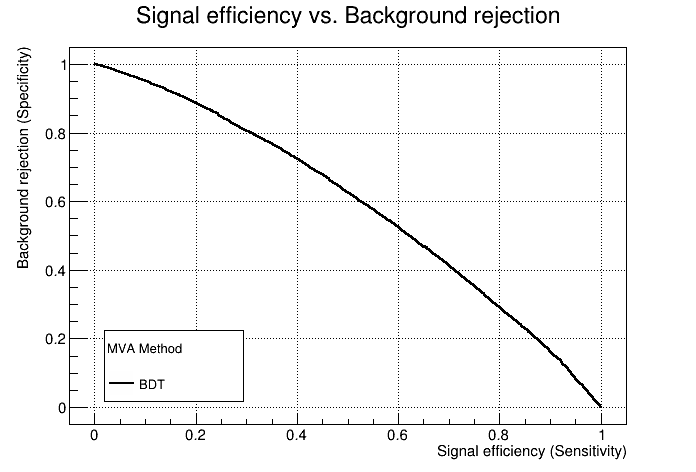

In [10]:
c1 = factory.GetROCCurve(loader);
c1.Draw();


####  Close outputfile to save all output information (evaluation result of methods)

In [11]:
outputFile.Close();